In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import boxcox

In [2]:
df = pd.read_csv("C:/Users/17172/Downloads/STAT5243_master_data.csv")

df_info = df.info()
df_head = df.head()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55377 entries, 0 to 55376
Data columns (total 69 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          55377 non-null  int64  
 1   X                                   55377 non-null  int64  
 2   Year                                55377 non-null  int64  
 3   DBN                                 55377 non-null  object 
 4   School.Name                         55377 non-null  object 
 5   Total.Enrollment                    55377 non-null  int64  
 6   X3k                                 55377 non-null  int64  
 7   prek                                55377 non-null  int64  
 8   k                                   55377 non-null  int64  
 9   grade1                              55377 non-null  int64  
 10  grade2                              55377 non-null  int64  
 11  grade3                              55377

Index(['Unnamed: 0', 'X', 'Year', 'DBN', 'School.Name', 'Total.Enrollment',
       'X3k', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4', 'grade5',
       'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'female_num', 'female_per', 'male_num', 'male_per', 'asian_num',
       'asian_per', 'black_num', 'black_per', 'hispanic_num', 'hispanic_per',
       'multirace_num', 'multirace_per', 'native_num', 'native_per',
       'white_num', 'white_per', 'other_num', 'other_per', 'swd_num',
       'swd_per', 'ell_num', 'ell_per', 'poverty_num', 'poverty_per',
       'economic.index', 'Grade', 'Category', 'Number.Tested',
       'Mean.Scale.Score', 'X..Level.1', 'X..Level.1.1', 'X..Level.2',
       'X..Level.2.1', 'X..Level.3', 'X..Level.3.1', 'X..Level.4',
       'X..Level.4.1', 'X..Level.3.4', 'X..Level.3.4.1',
       'Total.Parent..Response.Rate', 'Total.Teacher.Response.Rate',
       'Total.Student.Response.Rate', 'Collaborative.Teachers.Score',
       'Eff

In [3]:
df.head()

,Unnamed: 0,X,Year,DBN,School.Name,Total.Enrollment,X3k,prek,k,grade1,...,X..Level.3.4.1,Total.Parent..Response.Rate,Total.Teacher.Response.Rate,Total.Student.Response.Rate,Collaborative.Teachers.Score,Effective.School.Leadership.Score,Rigorous.Instruction.Score,Strong.Family.Community.Ties.Score,Trust.Score,borough
0,119,119,2017,01M034,P.S. 034 Franklin D. Roosevelt,333,0,13,25,18,...,3.85,29,60,96,2.01,2.4,2.44,2.88,2.57,Manhattan
1,120,120,2017,01M034,P.S. 034 Franklin D. Roosevelt,333,0,13,25,18,...,30.77,29,60,96,2.01,2.4,2.44,2.88,2.57,Manhattan
2,121,121,2017,01M034,P.S. 034 Franklin D. Roosevelt,333,0,13,25,18,...,12.21,29,60,96,2.01,2.4,2.44,2.88,2.57,Manhattan
3,122,122,2017,01M034,P.S. 034 Franklin D. Roosevelt,333,0,13,25,18,...,83.33,29,60,96,2.01,2.4,2.44,2.88,2.57,Manhattan
4,123,123,2017,01M034,P.S. 034 Franklin D. Roosevelt,333,0,13,25,18,...,8.70,29,60,96,2.01,2.4,2.44,2.88,2.57,Manhattan


               Year  Total.Enrollment           X3k          prek  \
count  55377.000000      55377.000000  55377.000000  55377.000000   
mean    2018.002510        615.239684      1.263358      9.696390   
std        0.821868        318.241564      5.513038     17.032418   
min     2017.000000         85.000000      0.000000      0.000000   
25%     2017.000000        372.000000      0.000000      0.000000   
50%     2018.000000        559.000000      0.000000      0.000000   
75%     2019.000000        792.000000      0.000000     18.000000   
max     2019.000000       2238.000000     44.000000     90.000000   

                  k        grade1        grade2        grade3        grade4  \
count  55377.000000  55377.000000  55377.000000  55377.000000  55377.000000   
mean      28.726674     29.736949     30.330101     31.767503     32.789750   
std       39.452297     40.709503     41.444723     43.104795     44.198476   
min        0.000000      0.000000      0.000000      0.000000 

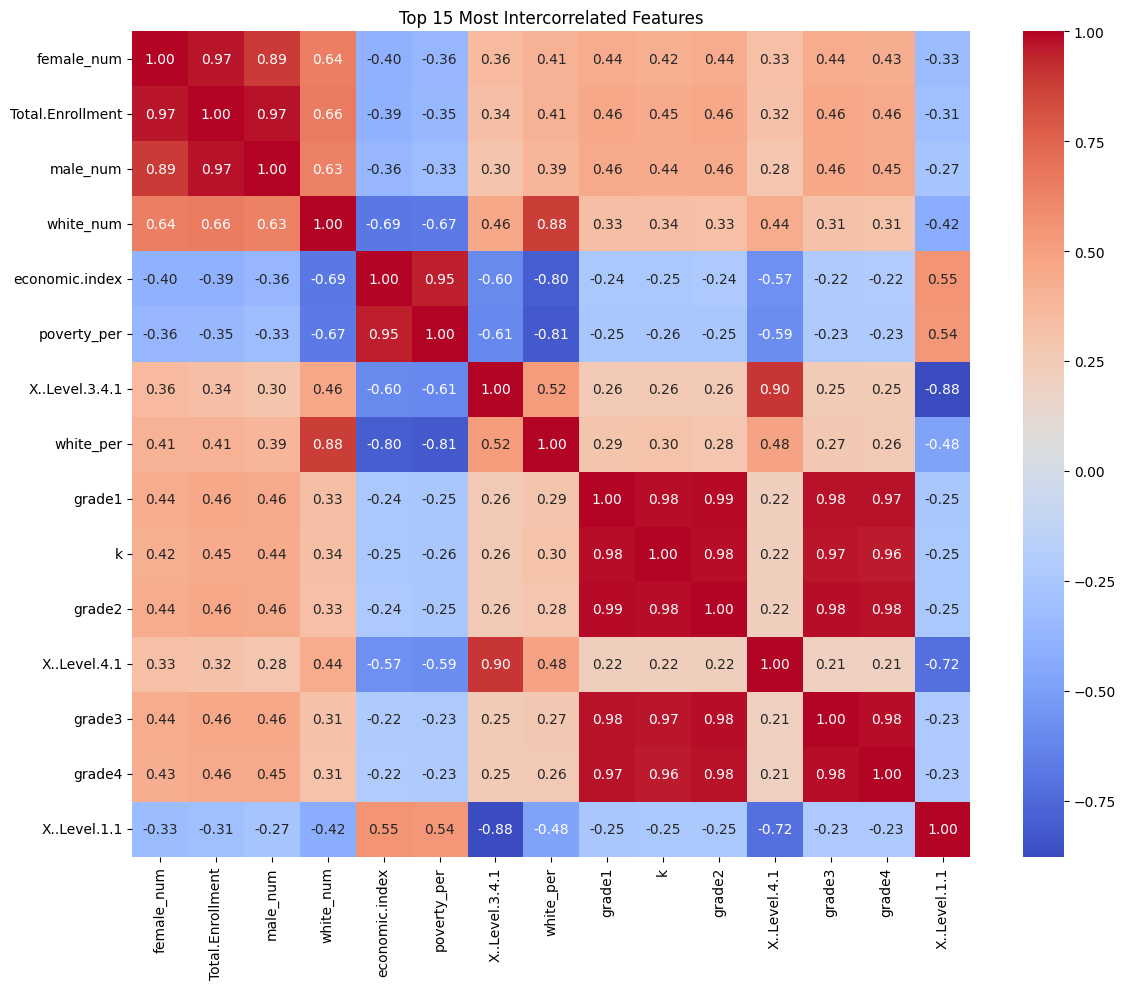

In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols].drop(columns=['Unnamed: 0', 'X'])

# Summary statistics
summary_stats = df_numeric.describe()
print(summary_stats)

# Correlation heatmap
cor_matrix = df_numeric.corr().abs()

mean_corr = cor_matrix.apply(lambda x: x.drop(labels=[x.name]).mean(), axis=1)

top_features = mean_corr.sort_values(ascending=False).head(15).index


plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top 15 Most Intercorrelated Features')
plt.tight_layout()
plt.show()

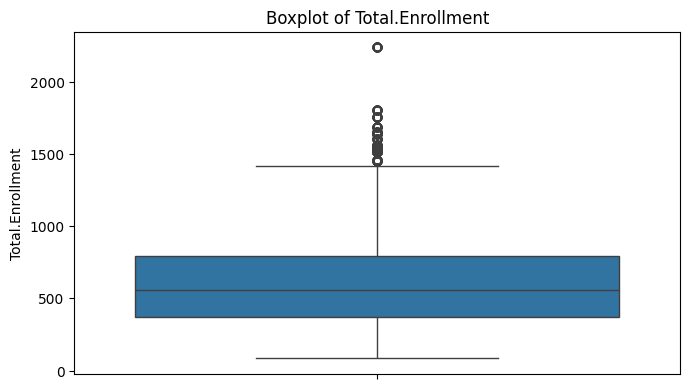

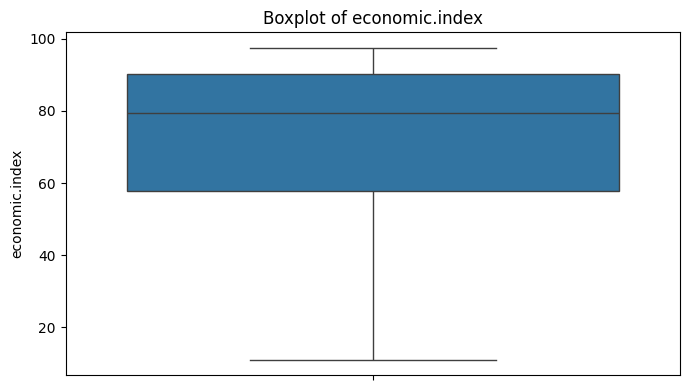

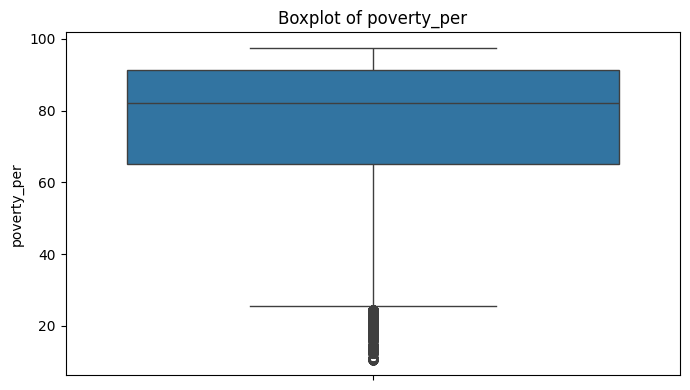

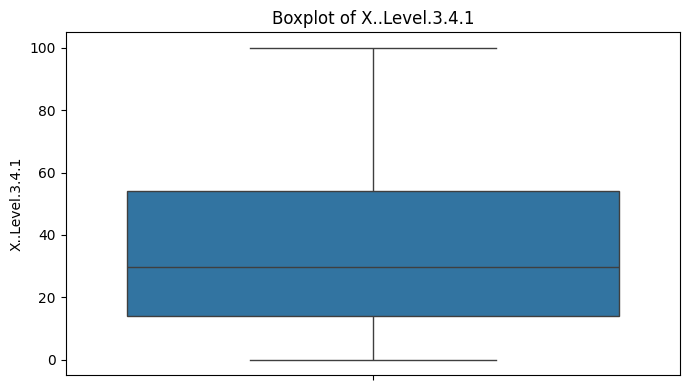

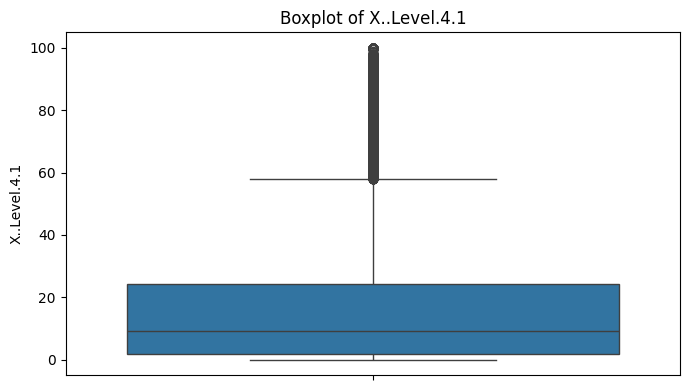

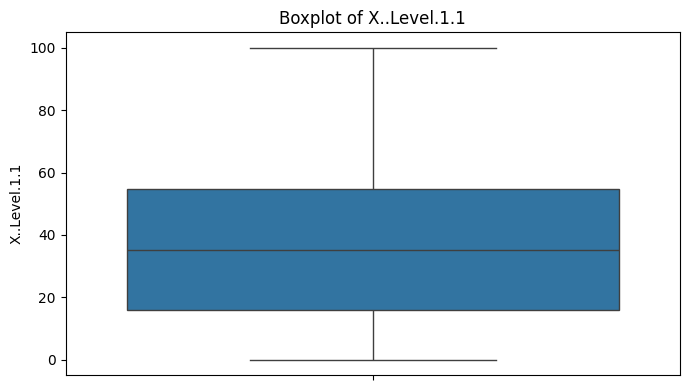

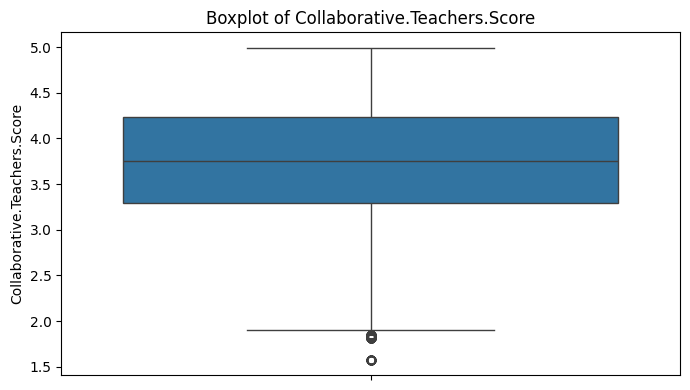

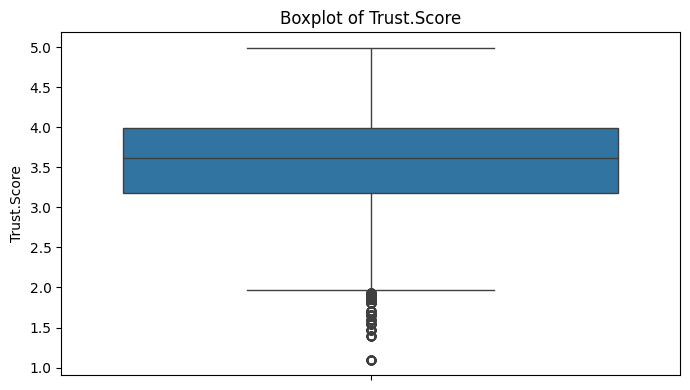

In [5]:
# Box Plots for Key Features
key_stats = [
    'Total.Enrollment', 'economic.index', 'poverty_per',
    'X..Level.3.4.1', 'X..Level.4.1', 'X..Level.1.1',
    'Collaborative.Teachers.Score', 'Trust.Score'
]

for metric in key_stats:
    plt.figure(figsize=(7, 4))
    sns.boxplot(y=df[metric])
    plt.title(f'Boxplot of {metric}')
    plt.tight_layout()
    plt.show()



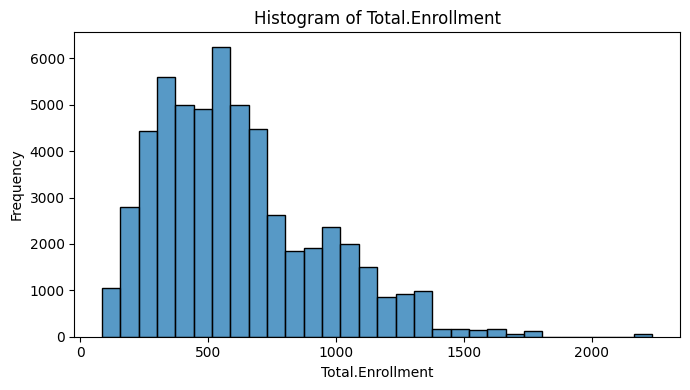

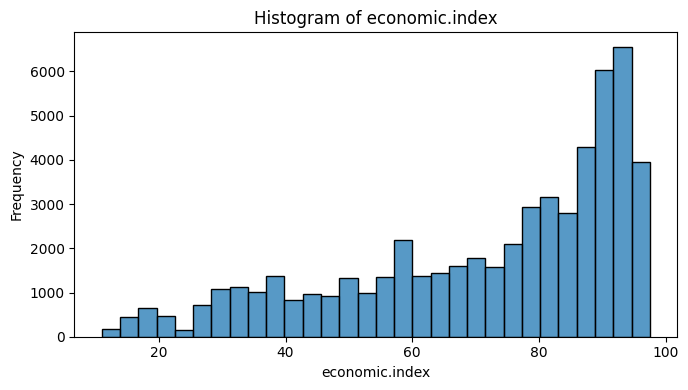

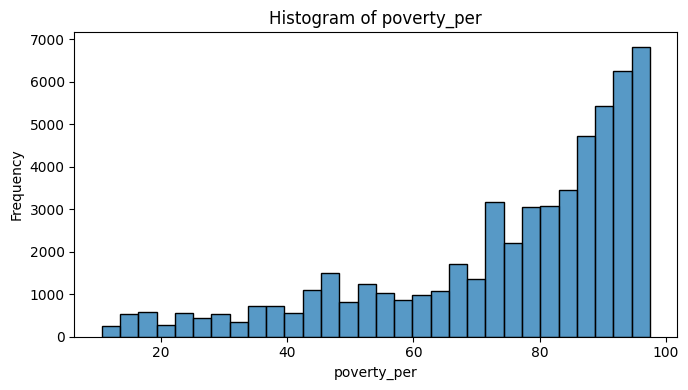

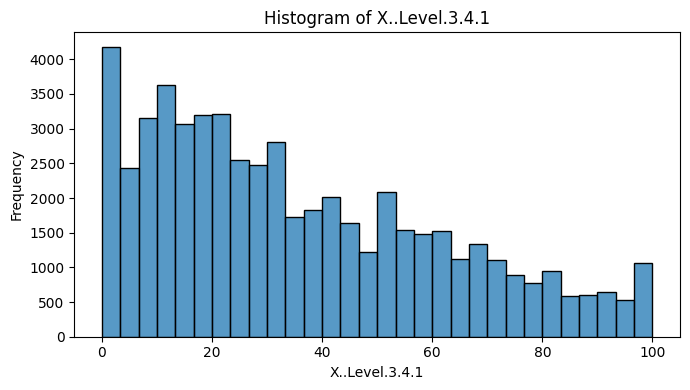

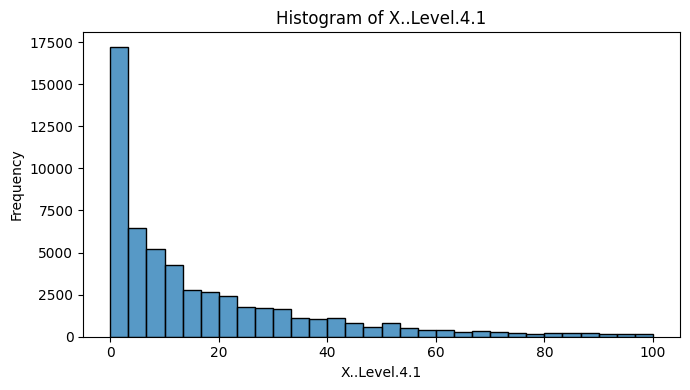

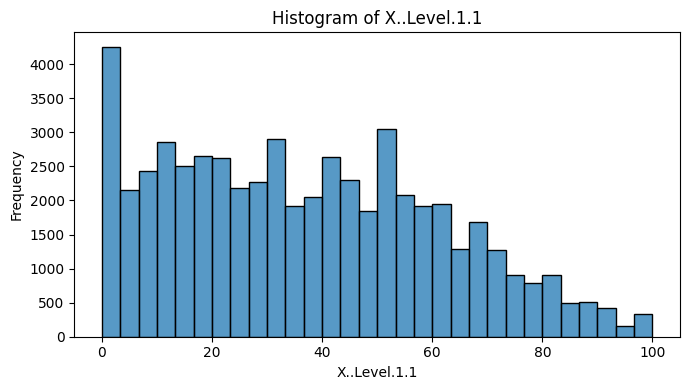

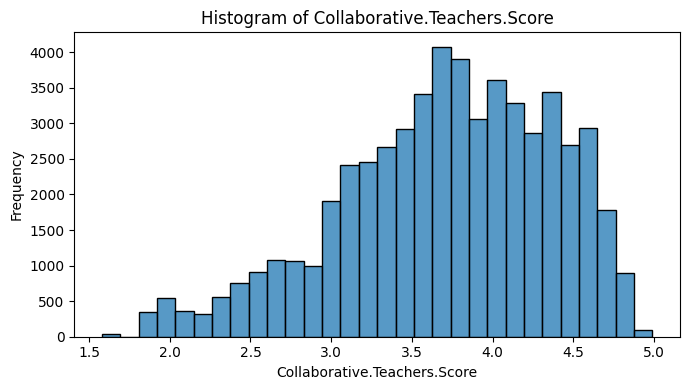

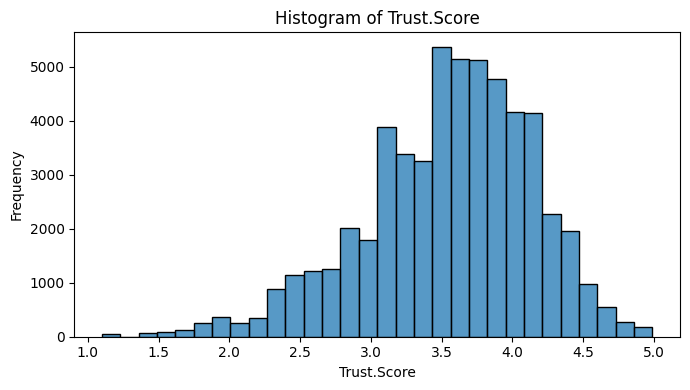

In [6]:
# Frequency Histograms for Key Features
for metric in key_stats:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[metric], bins=30, kde=False)
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

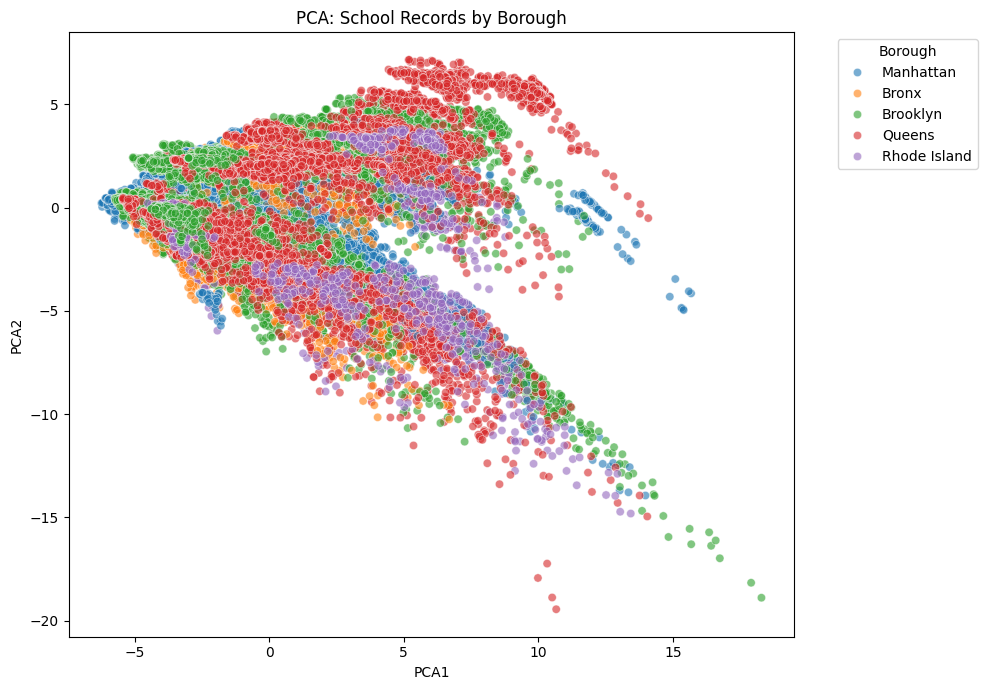

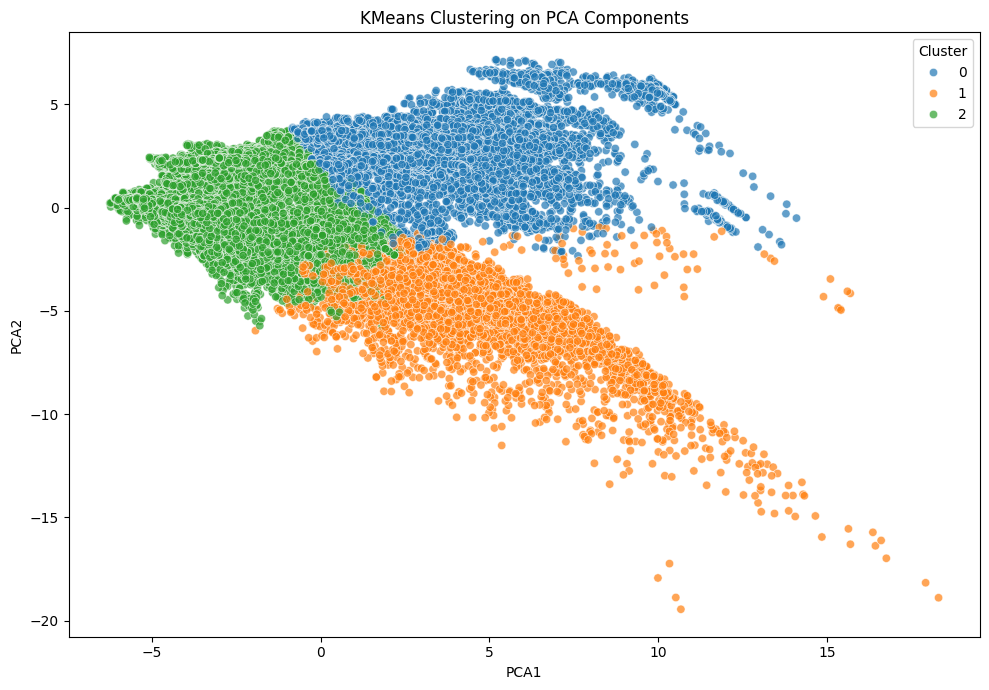

In [7]:
#  PCA
df_scaled = StandardScaler().fit_transform(df_numeric.fillna(0))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='borough', alpha=0.6)
plt.title('PCA: School Records by Borough')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='tab10', data=df, alpha=0.7)
plt.title('KMeans Clustering on PCA Components')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

         Total.Enrollment  economic.index  poverty_per  X..Level.3.4.1  \
cluster                                                                  
0                  818.23           58.23        61.73           51.66   
1                 1057.07           54.46        59.68           51.86   
2                  432.06           81.76        84.33           24.56   

         X..Level.4.1  X..Level.1.1  Collaborative.Teachers.Score  Trust.Score  
cluster                                                                         
0               27.40         22.87                          3.89         3.56  
1               30.35         24.19                          3.84         3.41  
2                8.89         45.77                          3.60         3.57  


C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


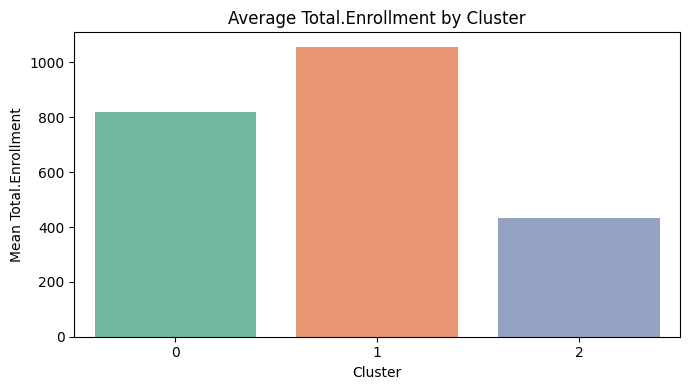

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


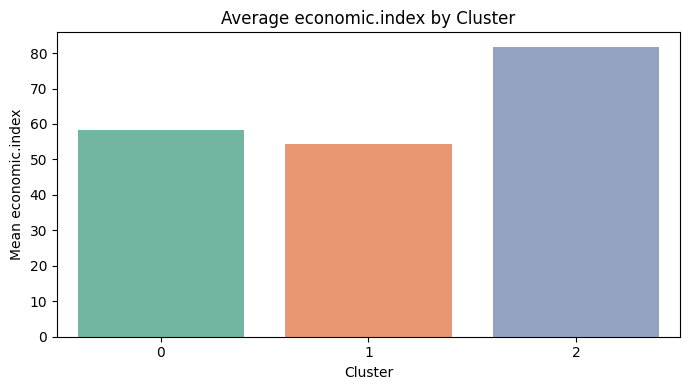

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


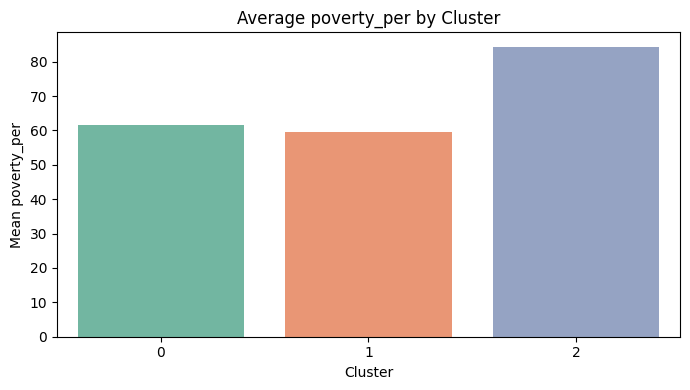

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


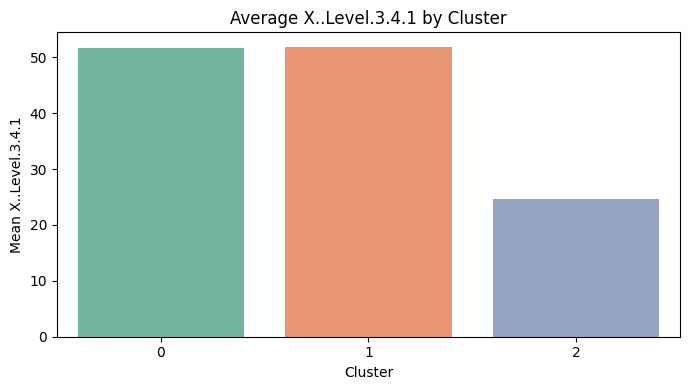

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


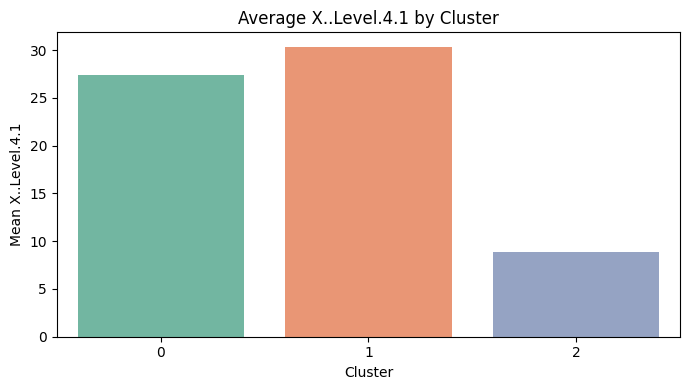

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


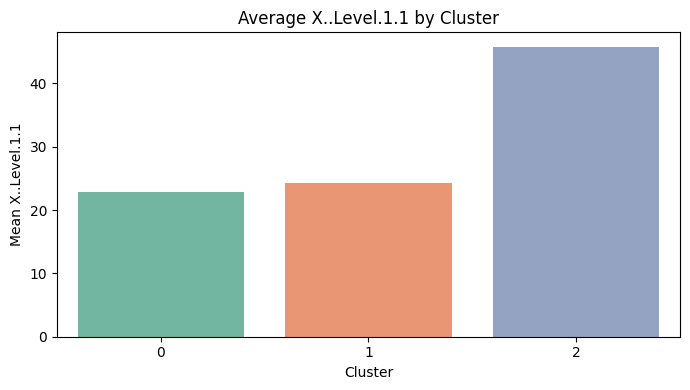

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


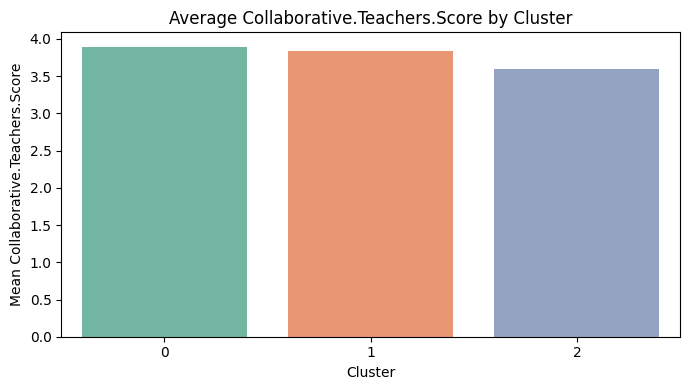

C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
C:\Users\17172\AppData\Local\Temp\ipykernel_16900\4161155818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)


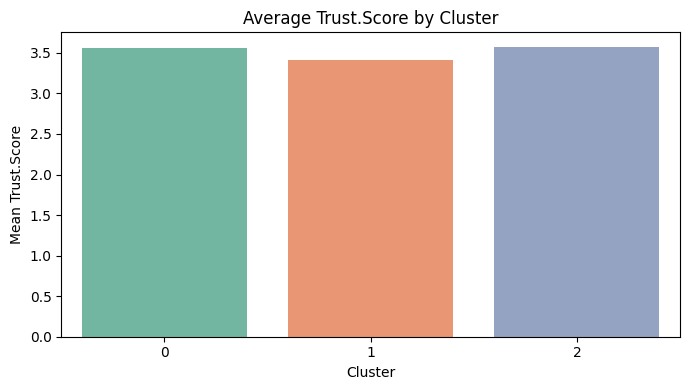

In [8]:
# Cluster-wise Comparison of Key Features
cluster_summary = df.groupby('cluster')[
    key_stats
].mean().round(2)

print(cluster_summary)

cluster_summary_reset = cluster_summary.reset_index()
summary_long = pd.melt(cluster_summary_reset, id_vars='cluster', var_name='Metric', value_name='Value')

palette = sns.color_palette("Set2", df['cluster'].nunique())

for metric in key_stats:
    plt.figure(figsize=(7, 4))
    sns.barplot(x='cluster', y=metric, data=df, estimator=np.mean, ci=None, palette=palette)
    plt.title(f'Average {metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {metric}')
    plt.tight_layout()
    plt.show()

In [9]:
# Feature Engineering

# Aggregate Grade Enrollments
df['elementary_enrollment'] = df[['grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6']].sum(axis=1)
df['middle_enrollment'] = df[['grade7', 'grade8']].sum(axis=1)
df['high_enrollment'] = df[['grade9', 'grade10', 'grade11', 'grade12']].sum(axis=1)
df.drop(columns= ['Grade', 'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12'], inplace=True)
# Ratio Features
df['male_female_ratio'] = df['male_num'] / (df['female_num']) 

df['swd_ratio'] = np.where(df['Total.Enrollment'] > 0, df['swd_num'] / df['Total.Enrollment'], 0)
df['ell_ratio'] = np.where(df['Total.Enrollment'] > 0, df['ell_num'] / df['Total.Enrollment'], 0)
df['poverty_ratio'] = np.where(df['Total.Enrollment'] > 0, df['poverty_num'] / df['Total.Enrollment'], 0)

#  Log Transforms
df['log_enrollment'] = np.log1p(df['Total.Enrollment'])
df['log_tested'] = np.log1p(df['Number.Tested'])

# One-hot Encoding of Categorical Features
df = pd.get_dummies(df, columns=['borough'], drop_first=True, dtype=int)

# Drop non-predictive fields
df.drop(columns=['Unnamed: 0', 'X', 'Category'], inplace=True)

# Compute weighted performance score
df['performance_score'] = (
    1 * df['X..Level.1.1'] +
    2 * df['X..Level.2.1'] +
    3 * df['X..Level.3.1'] +
    4 * df['X..Level.4.1']
) / 100

# box-cox performance score
df['performance_score_boxcox'], fitted_lambda = boxcox(df['performance_score'])

# Create performance tier categorical variable
df['performance_tier'] = pd.cut(df['performance_score'],
                                bins=[0, 1.5, 2.5, 3.5, 4],
                                labels=['Low', 'Basic', 'Proficient', 'Advanced'])

# drop level columns
df.drop(columns=[ 'X..Level.1', 'X..Level.1.1', 'X..Level.2', 'X..Level.2.1', 'X..Level.3', 'X..Level.3.1', 'X..Level.4', 'X..Level.4.1', 'X..Level.3.4', 'X..Level.3.4.1'], inplace=True)


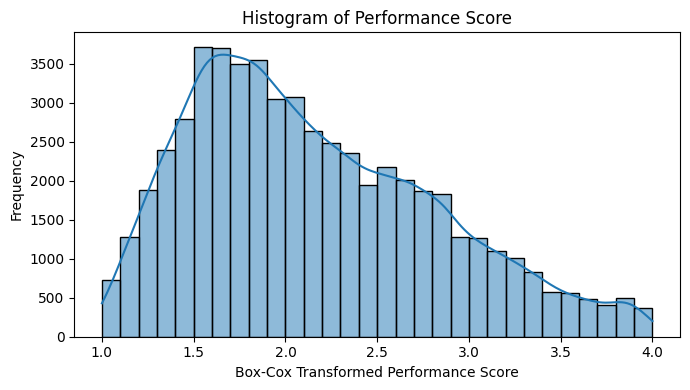

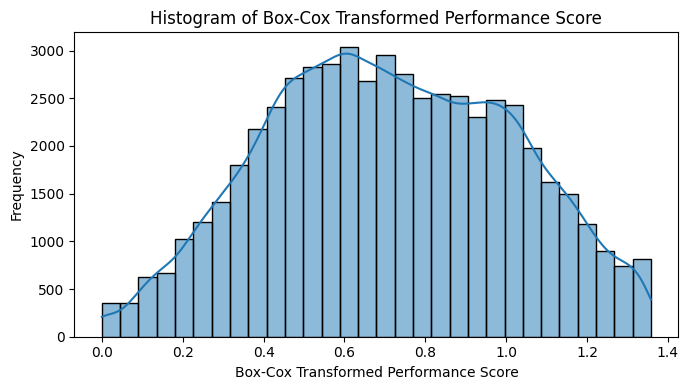

In [10]:
plt.figure(figsize=(7, 4))
sns.histplot(df['performance_score'], bins=30, kde=True)
plt.title('Histogram of Performance Score')
plt.xlabel('Box-Cox Transformed Performance Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.figure(figsize=(7, 4))
sns.histplot(df['performance_score_boxcox'], bins=30, kde=True)
plt.title('Histogram of Box-Cox Transformed Performance Score')
plt.xlabel('Box-Cox Transformed Performance Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
df.to_csv("engineered_school_data_Final.csv", index=False)